In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Case for homogeneous probabilility weights

at [0, 0]: mc = 0.090
at [0, 1]: mc = 0.120
at [0, 2]: mc = 0.125

at [1, 0]: mc = 0.088
at [1, 1]: mc = 0.113
at [1, 2]: mc = 0.112

at [2, 0]: mc = 0.105
at [2, 1]: mc = 0.127
at [2, 2]: mc = 0.120



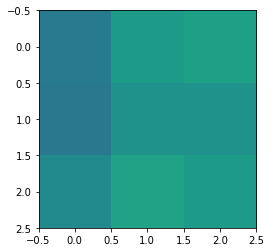

In [145]:
nrep = 1000
count = np.zeros((3, 3))
moves = np.array([[+1, 0], [-1, 0], [0, +1], [0, -1]])
coins = np.random.randint(4, size=nrep)

pos = np.random.randint(3, size=2)
for coin in coins:
    ahead = pos + moves[int(coin)]
    if ahead[0] < 0 or ahead[0] > 2 or ahead[1] < 0 or ahead[1] > 2:
        count[pos[0], pos[1]] += 1
    else:
        pos = ahead
        count[pos[0], pos[1]] += 1
        
plt.rcParams['figure.figsize'] = (4.0, 4.0)
count_norm = count / count.sum()
plt.imshow(count_norm)
plt.clim((0., 0.22))

for i in range(3):
    for j in range(3):
        print('at [{:d}, {:d}]: mc = {:1.3f}'.\
              format(i, j, count_norm[i,j]))
    print()

# Case for inhomogeneous probabilility weights

at [0, 0]: (pi, mc) = (0.163, 0.134)
at [0, 1]: (pi, mc) = (0.051, 0.055)
at [0, 2]: (pi, mc) = (0.151, 0.193)

at [1, 0]: (pi, mc) = (0.096, 0.088)
at [1, 1]: (pi, mc) = (0.029, 0.030)
at [1, 2]: (pi, mc) = (0.054, 0.060)

at [2, 0]: (pi, mc) = (0.146, 0.141)
at [2, 1]: (pi, mc) = (0.173, 0.165)
at [2, 2]: (pi, mc) = (0.136, 0.133)



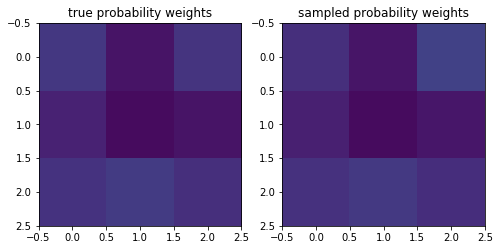

In [146]:
nrep = 10000
pi = np.random.rand(3, 3)
pi /= pi.sum()
count = np.zeros((3, 3))
moves = np.array([[+1, 0], [-1, 0], [0, +1], [0, -1]])
coins= np.random.randint(4, size=nrep)

pos = np.random.randint(3, size=2)
for coin in coins:
    ahd = pos + moves[int(coin)]
    if ahd[0] < 0 or ahd[0] > 2 or ahd[1] < 0 or ahd[1] > 2:
        count[pos[0], pos[1]] += 1
    else:
        ratio  = pi[ahd[0], ahd[1]] / pi[pos[0], pos[1]]
        if ratio > 1:
            pos = ahd
            count[pos[0], pos[1]] += 1
        elif np.random.rand() <= ratio:
            pos = ahd
            count[pos[0], pos[1]] += 1
        else:
            count[pos[0], pos[1]] += 1

count_norm = count / count.sum()

plt.rcParams['figure.figsize'] = (8.0, 4.0)
plt.subplot(1, 2, 1)
plt.imshow(pi)
plt.title('true probability weights')
plt.clim((0., 1.))
plt.subplot(1, 2, 2)
plt.imshow(count_norm)
plt.clim((0., 1.))
plt.title('sampled probability weights')

for i in range(3):
    for j in range(3):
        print('at [{:d}, {:d}]: (pi, mc) = ({:1.3f}, {:1.3f})'.\
              format(i, j, pi[i,j], count_norm[i,j]))
    print()

# Case for inhomogeneous probabilility weights
### - compact represtation of the board -

In [217]:
def markov_chain_monte_carlo_metropolis_hastings_3x3peeble(nrep):
    pi = np.random.rand(9)
    pi /= pi.sum()
    count = np.zeros((nrep + 1, 9))
    coins = np.random.randint(4, size=nrep)
    neighbor = np.array([[0, 0, 1, 3],
                         [0, 1, 2, 4],
                         [1, 2, 2, 5],
                         [0, 3, 4, 6],
                         [1, 3, 5, 7],
                         [2, 4, 5, 8],
                         [3, 6, 6, 7],
                         [4, 6, 7, 8],
                         [5, 7, 8, 8]])

    pos = np.random.randint(9)
    for i in range(nrep):
        pos_new = neighbor[pos][coins[i]]
        if np.random.rand() < pi[pos_new] / pi[pos]:
            pos = pos_new
        count[i + 1, :] = count[i, :]
        count[i + 1, pos] += 1
    count = count[1:, :]
    count_norm = count / count.sum(axis=1, keepdims=True)
    return pi, count_norm


at [0, 0]: (ground truth, mcmh sampled) = (0.126, 0.124)
at [0, 1]: (ground truth, mcmh sampled) = (0.132, 0.118)
at [0, 2]: (ground truth, mcmh sampled) = (0.055, 0.033)

at [1, 0]: (ground truth, mcmh sampled) = (0.043, 0.047)
at [1, 1]: (ground truth, mcmh sampled) = (0.141, 0.148)
at [1, 2]: (ground truth, mcmh sampled) = (0.155, 0.147)

at [2, 0]: (ground truth, mcmh sampled) = (0.026, 0.033)
at [2, 1]: (ground truth, mcmh sampled) = (0.158, 0.187)
at [2, 2]: (ground truth, mcmh sampled) = (0.164, 0.163)



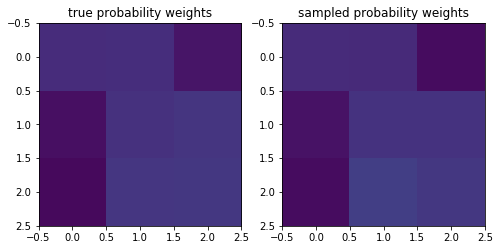

In [218]:
nrep = 1000
pi, count_norm = markov_chain_monte_carlo_metropolis_hastings_3x3peeble(nrep)

plt.rcParams['figure.figsize'] = (8.0, 4.0)
plt.subplot(1, 2, 1)
plt.imshow(pi.reshape(3,3))
plt.title('true probability weights')
plt.clim((0., 1.))
plt.subplot(1, 2, 2)
plt.imshow(count_norm[-1, :].reshape(3,3))
plt.clim((0., 1.))
plt.title('sampled probability weights')

for i in range(9):
    x = i // 3
    y = i % 3
    print('at [{:d}, {:d}]: (ground truth, mcmh sampled) = ({:1.3f}, {:1.3f})'.\
            format(x, y, pi[i], count_norm[-1, i]))
    if y == 2:
        print()

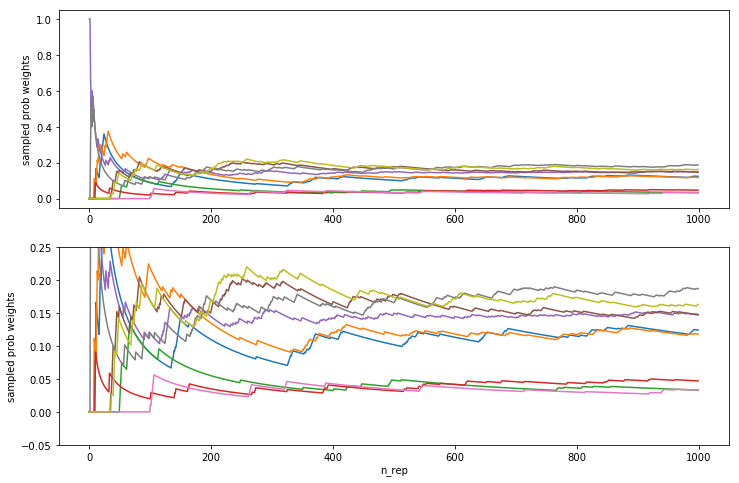

In [220]:
plt.rcParams['figure.figsize'] = (12.0, 8.0)

plt.subplot(2,1,1)
for i in range(9):
    plt.plot(count_norm[:, i], '-')
plt.ylabel('sampled prob weights')

plt.subplot(2,1,2)
for i in range(9):
    plt.plot(count_norm[:, i], '-')
plt.ylim((-0.05, 0.25))
plt.xlabel('n_rep')
plt.ylabel('sampled prob weights')

at [0, 0]: (ground truth, mcmh sampled) = (0.077, 0.078)
at [0, 1]: (ground truth, mcmh sampled) = (0.105, 0.105)
at [0, 2]: (ground truth, mcmh sampled) = (0.109, 0.113)

at [1, 0]: (ground truth, mcmh sampled) = (0.025, 0.024)
at [1, 1]: (ground truth, mcmh sampled) = (0.103, 0.101)
at [1, 2]: (ground truth, mcmh sampled) = (0.150, 0.152)

at [2, 0]: (ground truth, mcmh sampled) = (0.154, 0.151)
at [2, 1]: (ground truth, mcmh sampled) = (0.154, 0.151)
at [2, 2]: (ground truth, mcmh sampled) = (0.123, 0.125)



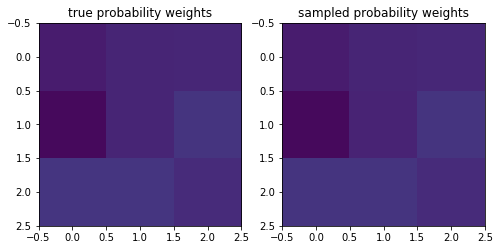

In [222]:
nrep = 100000
pi, count_norm = markov_chain_monte_carlo_metropolis_hastings_3x3peeble(nrep)

plt.rcParams['figure.figsize'] = (8.0, 4.0)
plt.subplot(1, 2, 1)
plt.imshow(pi.reshape(3,3))
plt.title('true probability weights')
plt.clim((0., 1.))
plt.subplot(1, 2, 2)
plt.imshow(count_norm[-1, :].reshape(3,3))
plt.clim((0., 1.))
plt.title('sampled probability weights')

for i in range(9):
    x = i // 3
    y = i % 3
    print('at [{:d}, {:d}]: (ground truth, mcmh sampled) = ({:1.3f}, {:1.3f})'.\
            format(x, y, pi[i], count_norm[-1, i]))
    if y == 2:
        print()

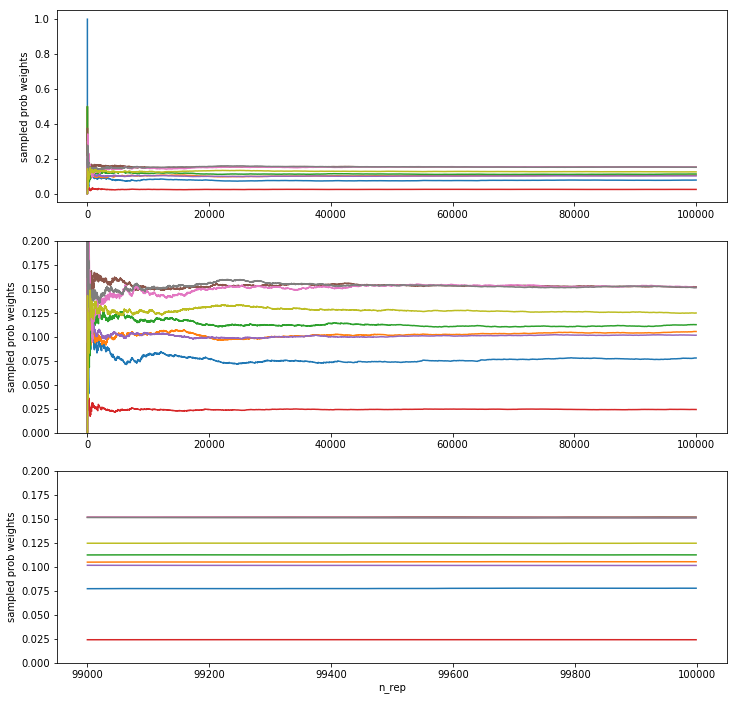

In [226]:
plt.rcParams['figure.figsize'] = (12.0, 12.0)

plt.subplot(3,1,1)
for i in range(9):
    plt.plot(count_norm[:, i], '-')
plt.ylabel('sampled prob weights')

plt.subplot(3,1,2)
for i in range(9):
    plt.plot(count_norm[:, i], '-')
plt.ylim((-0.00, 0.20))
plt.ylabel('sampled prob weights')

plt.subplot(3,1,3)
for i in range(9):
    plt.plot(np.arange(nrep-1000, nrep, 1), count_norm[-1000:, i], '-')
plt.ylim((-0.00, 0.20))
plt.xlabel('n_rep')
plt.ylabel('sampled prob weights')